# ВЕБИНАР 4: Библиотеки машинного обучения в Python (часть 1)

В этом вебинаре мы рассмотрим базовые возможности библиотеки scikit-learn для машинного обучения в Python. Мы познакомимся с загрузкой и предобработкой данных, изучим несколько алгоритмов машинного обучения, научимся настраивать гиперпараметры моделей, оценивать качество моделей, а также сохранять и загружать обученные модели.

## 1. Введение в scikit-learn

Scikit-learn (или sklearn) — это одна из самых популярных библиотек для машинного обучения в Python. Она предоставляет множество алгоритмов для классификации, регрессии, кластеризации и снижения размерности данных, а также инструменты для предобработки данных и оценки моделей.


Установка scikit-learn

Установить библиотеку можно с помощью pip:

pip install scikit-learn

## 2. Загрузка и предобработка данных

Перед тем как обучать модель, необходимо загрузить данные и выполнить их предобработку.

Загрузка данных

Для примера будем использовать набор данных Iris, который входит в состав scikit-learn.



In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.datasets import load_iris

# Загрузка набора данных Iris
iris = load_iris()
X = iris.data  # признаки
y = iris.target  # метки классов

Разделение данных на обучающий и тестовый наборы

Для оценки качества модели разделим данные на обучающую и тестовую выборки.

In [4]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Предобработка данных

Обычно рекомендуется стандартизировать признаки для алгоритмов, чувствительных к масштабированию данных.

In [5]:
from sklearn.preprocessing import StandardScaler

# Инициализация стандартизатора
scaler = StandardScaler()

# Подгонка стандартизатора по обучающим данным и преобразование обучающих данных
X_train_scaled = scaler.fit_transform(X_train)

# Преобразование тестовых данных
X_test_scaled = scaler.transform(X_test)

## 3. Алгоритмы машинного обучения в scikit-learn

Рассмотрим несколько популярных алгоритмов:

Классификация: Логистическая регрессия, Метод опорных векторов (SVM)
Регрессия: Линейная регрессия, Деревья решений

### 3.1. Логистическая регрессия

In [7]:
from sklearn.linear_model import LogisticRegression

# Инициализация модели логистической регрессии
logreg = LogisticRegression()

# Обучение модели на обучающей выборке
logreg.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = logreg.predict(X_test_scaled)

In [8]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### 3.2. Метод опорных векторов (SVM)

In [10]:
from sklearn.svm import SVC

# Инициализация модели SVM с линейным ядром
svm = SVC(kernel='linear')

# Обучение модели
svm.fit(X_train_scaled, y_train)

# Предсказание
y_pred_svm = svm.predict(X_test_scaled)

### 3.3. Линейная регрессия

Для задачи регрессии используем набор данных Boston Housing.

In [12]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X_boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y_boston = raw_df.values[1::2, 2]

In [18]:

# Разделение данных
X_train_bos, X_test_bos, y_train_bos, y_test_bos = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

# Стандартизация данных
X_train_bos_scaled = scaler.fit_transform(X_train_bos)
X_test_bos_scaled = scaler.transform(X_test_bos)

from sklearn.linear_model import LinearRegression

# Инициализация модели линейной регрессии
linreg = LinearRegression()

# Обучение модели
linreg.fit(X_train_bos_scaled, y_train_bos)

# Предсказание
y_pred_bos = linreg.predict(X_test_bos_scaled)

In [24]:
sum((y_pred_bos-y_test_bos)**2)/len(y_pred_bos)

24.29111947497351

In [23]:
y_pred_bos.mean()

21.252409108768177

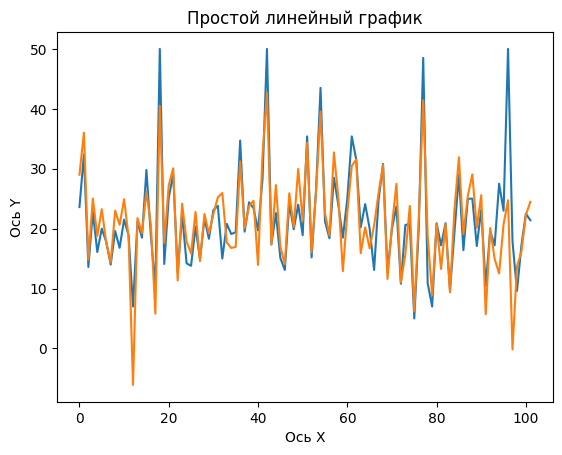

In [25]:
import matplotlib.pyplot as plt



# Построение графика
plt.plot(y_test_bos)
plt.plot(y_pred_bos)
# Добавление подписей и заголовка
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('Простой линейный график')

# Отображение графика
plt.show()

In [22]:
len(y_pred_bos)

102

### 3.4. Деревья решений

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
dtree = DecisionTreeClassifier(random_state=42)

# Обучение модели
dtree.fit(X_train, y_train)

# Предсказание
y_pred_tree = dtree.predict(X_test)

## 4. Настройка гиперпараметров

Для улучшения качества моделей можно настроить их гиперпараметры с помощью поиска по сетке гиперпараметров.

GridSearchCV


In [29]:
from sklearn.model_selection import GridSearchCV

# Определим параметры для перебора
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Обучение моделей на разных комбинациях гиперпараметров
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель
best_logreg = grid_search.best_estimator_

# Предсказание с помощью лучшей модели
y_pred_best = best_logreg.predict(X_test_scaled)

## 5. Оценка качества моделей

Для оценки качества моделей используются различные метрики.

Метрики для классификации

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Точность
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Метрики для регрессии

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

# Среднеквадратичная ошибка
mse = mean_squared_error(y_test_bos, y_pred_bos)
print("MSE:", mse)

# Коэффициент детерминации
r2 = r2_score(y_test_bos, y_pred_bos)
print("R2 Score:", r2)

MSE: 24.29111947497351
R2 Score: 0.6687594935356321


Кросс-валидация

In [32]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация для модели логистической регрессии
cv_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.91666667 1.         0.79166667 1.         0.95833333]
Mean CV score: 0.9333333333333332


## 6. Сохранение и загрузка моделей

Для использования обученных моделей в будущем их можно сохранить на диск.

Сохранение модели

In [33]:
best_logreg

LogisticRegression(C=10, solver='liblinear')

In [34]:
import joblib

# Сохранение модели логистической регрессии
joblib.dump(best_logreg, 'best_logreg_model.pkl')

# Сохранение стандартизатора
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Загрузка модели

In [35]:
# Загрузка модели
loaded_model = joblib.load('best_logreg_model.pkl')

# Загрузка стандартизатора
loaded_scaler = joblib.load('scaler.pkl')

# Пример использования загруженной модели
X_new = [[5.1, 3.5, 1.4, 0.2]]  # Новое наблюдение
# X_new_scaled = loaded_scaler.transform(X_new)
prediction = loaded_model.predict(X_new)
print("Prediction:", prediction)

Prediction: [1]


# Заключение

Мы рассмотрели основные шаги работы с библиотекой scikit-learn для машинного обучения:

Загрузка и предобработка данных
Обучение моделей машинного обучения
Настройка гиперпараметров
Оценка качества моделей
Сохранение и загрузка моделей

Эти навыки являются базовыми для решения задач машинного обучения с использованием Python и scikit-learn.


Примечание: Для выполнения кода необходим Python 3 и установленные библиотеки scikit-learn, numpy, scipy, joblib.